# 1st Artificial Neural Network

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('C:\\Users\\Shariq\\DATAS\\Folder_DL\\Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [7]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [11]:
# Initialising the ANN
classifier = Sequential()

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [13]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 317us/step - loss: 0.5650 - accuracy: 0.7572 - val_loss: 0.5032 - val_accuracy: 0.7891
Epoch 2/100
5359/5359 [==============================] - 1s 275us/step - loss: 0.4908 - accuracy: 0.7919 - val_loss: 0.4756 - val_accuracy: 0.7929
Epoch 3/100
5359/5359 [==============================] - 1s 245us/step - loss: 0.4677 - accuracy: 0.7940 - val_loss: 0.4617 - val_accuracy: 0.7914
Epoch 4/100
5359/5359 [==============================] - 1s 243us/step - loss: 0.4535 - accuracy: 0.7951 - val_loss: 0.4530 - val_accuracy: 0.7940
Epoch 5/100
5359/5359 [==============================] - 1s 251us/step - loss: 0.4430 - accuracy: 0.7987 - val_loss: 0.4470 - val_accuracy: 0.7929
Epoch 6/100
5359/5359 [==============================] - 1s 250us/step - loss: 0.4361 - accuracy: 0.8015 - val_loss: 0.4439 - val_accuracy: 0.7944
Epoch 7/100
5359/5359 [==============================] - 1s 244us/step

5359/5359 [==============================] - 1s 243us/step - loss: 0.3419 - accuracy: 0.8586 - val_loss: 0.3659 - val_accuracy: 0.8546
Epoch 57/100
5359/5359 [==============================] - 1s 250us/step - loss: 0.3410 - accuracy: 0.8591 - val_loss: 0.3655 - val_accuracy: 0.8535
Epoch 58/100
5359/5359 [==============================] - 1s 244us/step - loss: 0.3405 - accuracy: 0.8584 - val_loss: 0.3645 - val_accuracy: 0.8550
Epoch 59/100
5359/5359 [==============================] - 1s 243us/step - loss: 0.3400 - accuracy: 0.8586 - val_loss: 0.3638 - val_accuracy: 0.8554
Epoch 60/100
5359/5359 [==============================] - 1s 247us/step - loss: 0.3394 - accuracy: 0.8597 - val_loss: 0.3634 - val_accuracy: 0.8565
Epoch 61/100
5359/5359 [==============================] - 1s 249us/step - loss: 0.3388 - accuracy: 0.8599 - val_loss: 0.3631 - val_accuracy: 0.8569
Epoch 62/100
5359/5359 [==============================] - 1s 274us/step - loss: 0.3387 - accuracy: 0.8584 - val_loss: 0.3622 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


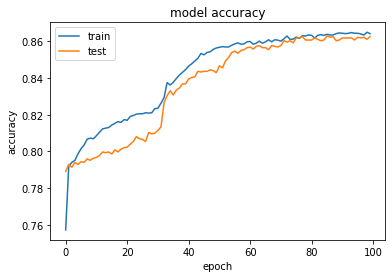

In [16]:
# list all data in history
print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


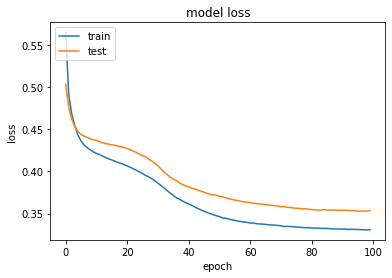

In [17]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
print(cm)

[[1516   79]
 [ 195  210]]


In [21]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [22]:
print(score)

0.863
